# Experiment data using Minitown and MiniCPS. MitM attack on SCADA
This notebook has the results running cyber security experiments using MiniCPS, WNTR, and the Minitown topology. The attack in this notebook is an mitm attack on SCADA. For this attack, results with both demand driven simulator and pressure driven simulator are presented. The mitm attack performs a replay attack. In this attack, the attacker first sniffs 100 packets and then injects them on the supervisory network

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Baseline simulation using WNTR and no minicps (works)
no_minicps_data = pd.read_csv('../no_minicps.csv')
demand_driven_no_attack = pd.read_csv('../../ICS_topologies/minitown_topology/demand_driven_data/no_attack/physical_process.csv')
demand_driven_mitm_scada = pd.read_csv('../../ICS_topologies/minitown_topology/demand_driven_data/attack_mitm_scada/physical_results.csv')

scada_demand_driven_no_attack = pd.read_csv('../../ICS_topologies/minitown_topology/demand_driven_data/no_attack/scada_saved_tank_levels_received.csv')
scada_demand_driven_mitm_scada = pd.read_csv('../../ICS_topologies/minitown_topology/demand_driven_data/attack_mitm_scada/scada_saved_tank_levels_received.csv')

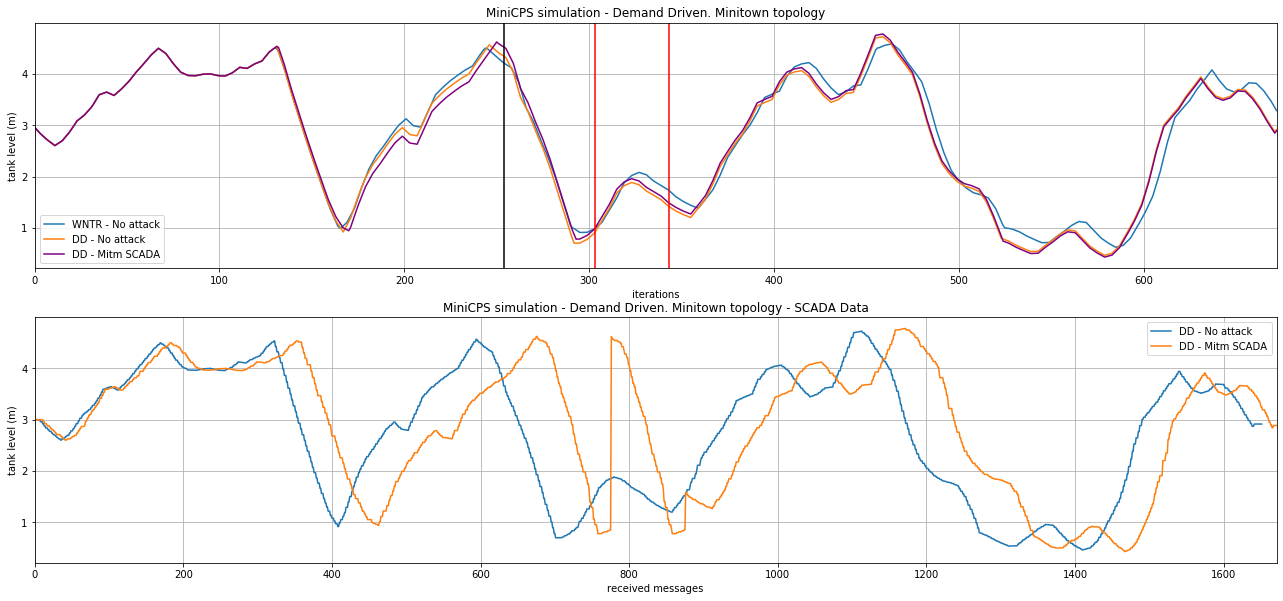

In [4]:
dd = plt.subplot(2,1,1)
no_minicps_data["TANK_LEVEL"].plot(label='WNTR - No attack', ax=dd)
demand_driven_no_attack["TANK_LEVEL"].plot(label='DD - No attack', ax=dd)
demand_driven_mitm_scada["TANK_LEVEL"].plot(label='DD - Mitm SCADA', ax=dd, color="Purple")
plt.axvline(x=254, color="black")
plt.axvline(x=303, color="red")
plt.axvline(x=343, color="red")
plt.title("MiniCPS simulation - Demand Driven. Minitown topology")
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)

dd = plt.subplot(2,1,2)
scada_demand_driven_no_attack["TANK_LEVEL"].plot(label='DD - No attack', ax=dd)
scada_demand_driven_mitm_scada["TANK_LEVEL"].plot(label='DD - Mitm SCADA', ax=dd)
plt.title("MiniCPS simulation - Demand Driven. Minitown topology - SCADA Data")
plt.xlabel('received messages')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)

In the figure above the horizontal black line shows the moment the attacker launches the mitm and starts sniffing packets. The first red line shows when the attacker starts injecting packets to the SCADA and the second one shows when the attack finishes

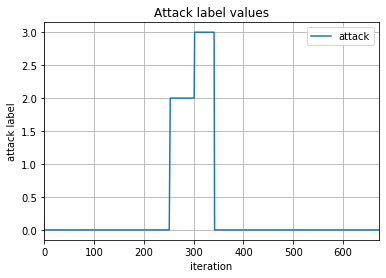

In [5]:
demand_driven_mitm_scada['Attack#01'].plot()

plt.legend(['attack','no attack'])
plt.title('Attack label values')
ax = plt.gca()
ax.set_xlabel("iteration")
ax.set_ylabel("attack label")
plt.grid(True)

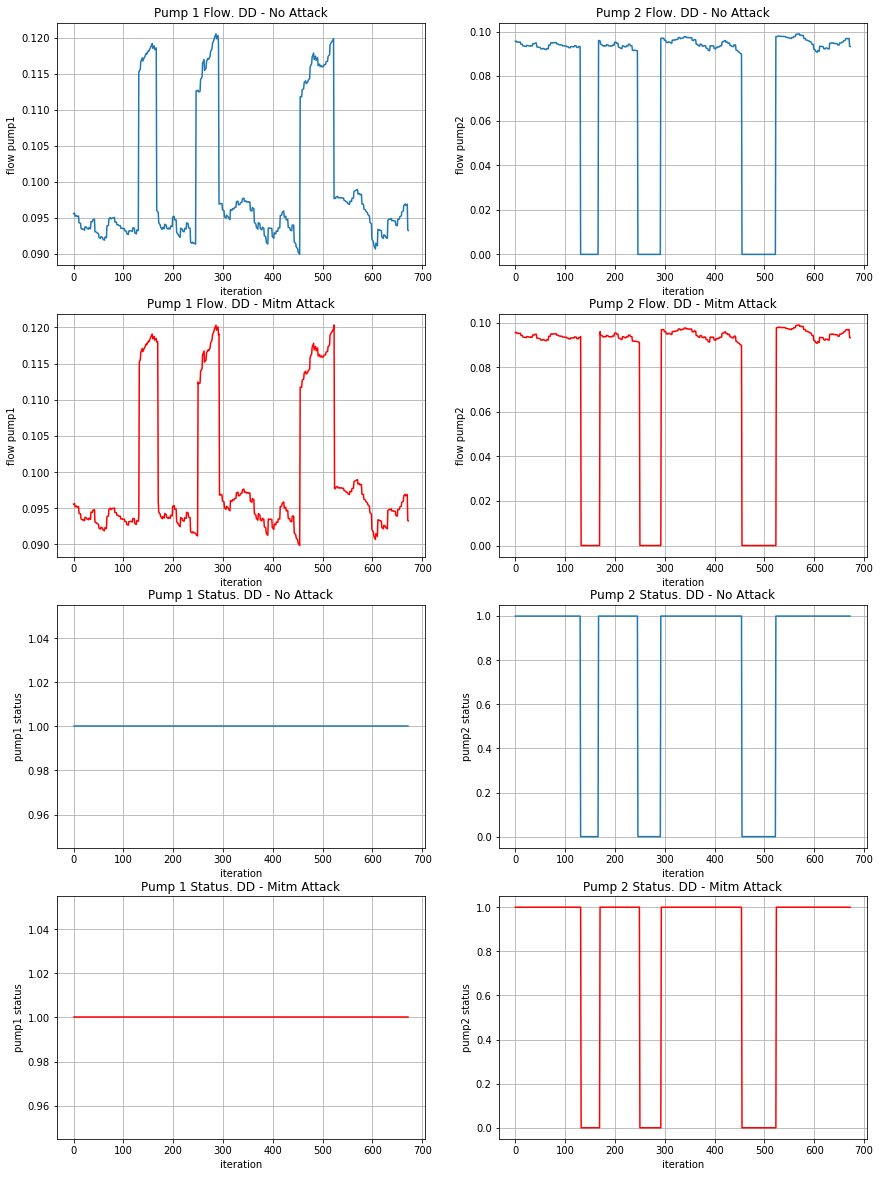

In [6]:
fp1 = demand_driven_no_attack['FLOW_PUMP1']
fp2 = demand_driven_no_attack['FLOW_PUMP2']
sp1 = demand_driven_no_attack['STATUS_PUMP1']
sp2 = demand_driven_no_attack['STATUS_PUMP2']

fp1_attack = demand_driven_mitm_scada['FLOW_PUMP1']
fp2_attack = demand_driven_mitm_scada['FLOW_PUMP2']
sp1_attack = demand_driven_mitm_scada['STATUS_PUMP1']
sp2_attack = demand_driven_mitm_scada['STATUS_PUMP2']

plt.subplot(421)
plt.plot(fp1)
plt.xlabel('iteration')
plt.ylabel('flow pump1')
plt.title('Pump 1 Flow. DD - No Attack')
plt.grid(True)

plt.subplot(422)
plt.plot(fp2)
plt.xlabel('iteration')
plt.ylabel('flow pump2')
plt.title('Pump 2 Flow. DD - No Attack')
plt.grid(True)

plt.subplot(423)
plt.plot(fp1_attack, color="red")
plt.xlabel('iteration')
plt.ylabel('flow pump1')
plt.title('Pump 1 Flow. DD - Mitm Attack')
plt.grid(True)

plt.subplot(424)
plt.plot(fp2_attack,color="red")
plt.xlabel('iteration')
plt.ylabel('flow pump2')
plt.title('Pump 2 Flow. DD - Mitm Attack')
plt.grid(True)

plt.subplot(425)
plt.plot(sp1)
plt.xlabel('iteration')
plt.ylabel('pump1 status')
plt.title('Pump 1 Status. DD - No Attack')
plt.grid(True)

plt.subplot(426)
plt.plot(sp2)
plt.xlabel('iteration')
plt.ylabel('pump2 status')
plt.title('Pump 2 Status. DD - No Attack')
plt.grid(True)

plt.subplot(427)
plt.plot(sp1_attack, color="red")
plt.xlabel('iteration')
plt.ylabel('pump1 status')
plt.title('Pump 1 Status. DD - Mitm Attack')
plt.grid(True)

plt.subplot(428)
plt.plot(sp2_attack, color="red")
plt.xlabel('iteration')
plt.ylabel('pump2 status')
plt.title('Pump 2 Status. DD - Mitm Attack')
plt.grid(True)


plt.subplots_adjust(top=4.00, right=2.00)

plt.show()

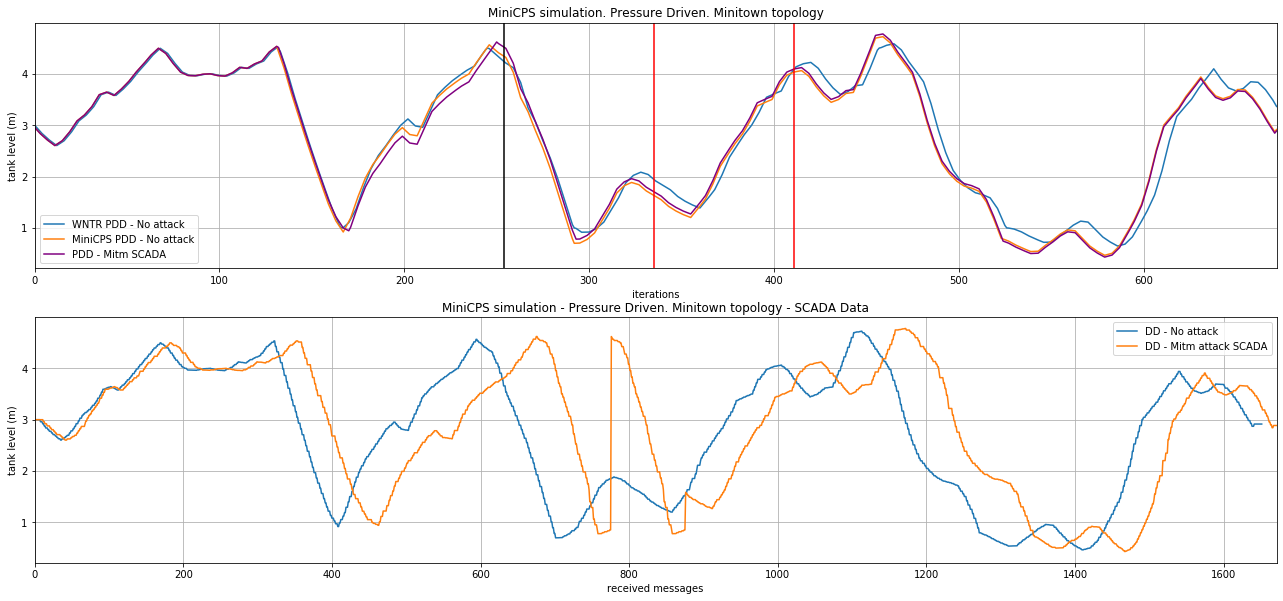

In [8]:
# Baseline simulation using WNTR and no minicps (works)
pressure_driven_no_attack = pd.read_csv('../../ICS_topologies/minitown_topology/demand_driven_data/no_attack/physical_process.csv')
no_minicps_data_pdd = pd.read_csv('../no_minicps_pdd.csv')
pressure_driven_mitm_scada = pd.read_csv('../../ICS_topologies/minitown_topology/demand_driven_data/attack_mitm_scada/physical_results.csv')

scada_pressure_driven_no_attack = pd.read_csv('../../ICS_topologies/minitown_topology/demand_driven_data/no_attack/scada_saved_tank_levels_received.csv')
scada_pressure_driven_mitm_scada = pd.read_csv('../../ICS_topologies/minitown_topology/demand_driven_data/attack_mitm_scada/scada_saved_tank_levels_received.csv')

dd = plt.subplot(2,1,1)
no_minicps_data_pdd["TANK_LEVEL"].plot(label='WNTR PDD - No attack', ax=dd)
pressure_driven_no_attack["TANK_LEVEL"].plot(label='MiniCPS PDD - No attack', ax=dd)
pressure_driven_mitm_scada["TANK_LEVEL"].plot(label='PDD - Mitm SCADA', ax=dd, color="purple")

plt.axvline(x=254, color="black")
plt.axvline(x=335, color="red")
plt.axvline(x=411, color="red")
plt.title("MiniCPS simulation. Pressure Driven. Minitown topology")
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)

dd = plt.subplot(2,1,2)
scada_pressure_driven_no_attack["TANK_LEVEL"].plot(label='DD - No attack', ax=dd)
scada_pressure_driven_mitm_scada["TANK_LEVEL"].plot(label='DD - Mitm attack SCADA', ax=dd)
plt.title("MiniCPS simulation - Pressure Driven. Minitown topology - SCADA Data")
plt.xlabel('received messages')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)

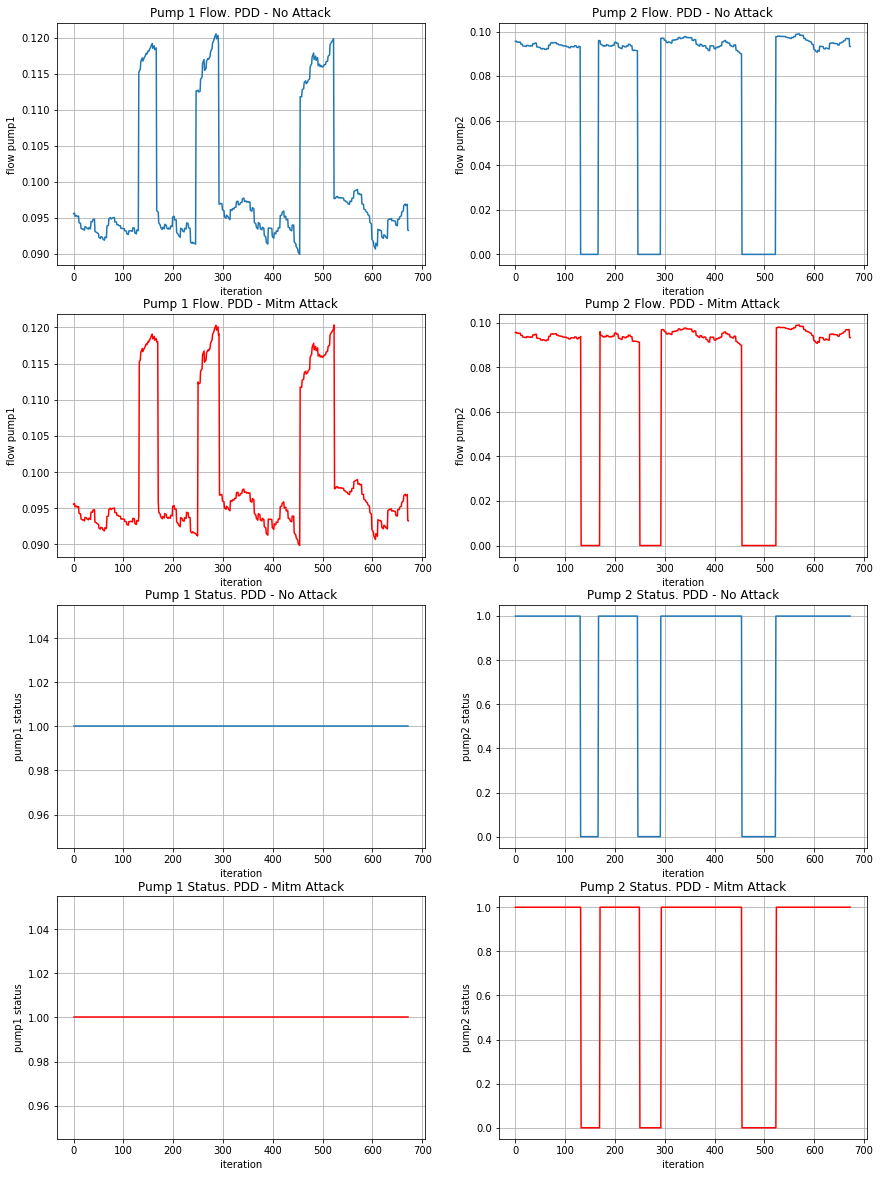

In [9]:
fp1 = pressure_driven_no_attack['FLOW_PUMP1']
fp2 = pressure_driven_no_attack['FLOW_PUMP2']
sp1 = pressure_driven_no_attack['STATUS_PUMP1']
sp2 = pressure_driven_no_attack['STATUS_PUMP2']

fp1_attack = pressure_driven_mitm_scada['FLOW_PUMP1']
fp2_attack = pressure_driven_mitm_scada['FLOW_PUMP2']
sp1_attack = pressure_driven_mitm_scada['STATUS_PUMP1']
sp2_attack = pressure_driven_mitm_scada['STATUS_PUMP2']

plt.subplot(421)
plt.plot(fp1)
plt.xlabel('iteration')
plt.ylabel('flow pump1')
plt.title('Pump 1 Flow. PDD - No Attack')
plt.grid(True)

plt.subplot(422)
plt.plot(fp2)
plt.xlabel('iteration')
plt.ylabel('flow pump2')
plt.title('Pump 2 Flow. PDD - No Attack')
plt.grid(True)

plt.subplot(423)
plt.plot(fp1_attack, color="red")
plt.xlabel('iteration')
plt.ylabel('flow pump1')
plt.title('Pump 1 Flow. PDD - Mitm Attack')
plt.grid(True)

plt.subplot(424)
plt.plot(fp2_attack,color="red")
plt.xlabel('iteration')
plt.ylabel('flow pump2')
plt.title('Pump 2 Flow. PDD - Mitm Attack')
plt.grid(True)

plt.subplot(425)
plt.plot(sp1)
plt.xlabel('iteration')
plt.ylabel('pump1 status')
plt.title('Pump 1 Status. PDD - No Attack')
plt.grid(True)

plt.subplot(426)
plt.plot(sp2)
plt.xlabel('iteration')
plt.ylabel('pump2 status')
plt.title('Pump 2 Status. PDD - No Attack')
plt.grid(True)

plt.subplot(427)
plt.plot(sp1_attack, color="red")
plt.xlabel('iteration')
plt.ylabel('pump1 status')
plt.title('Pump 1 Status. PDD - Mitm Attack')
plt.grid(True)

plt.subplot(428)
plt.plot(sp2_attack, color="red")
plt.xlabel('iteration')
plt.ylabel('pump2 status')
plt.title('Pump 2 Status. PDD - Mitm Attack')
plt.grid(True)


plt.subplots_adjust(top=4.00, right=2.00)

plt.show()